# NB: Classes Example

Here's an example of a class motivated by our earlier observation that functions come in groups.

## Set Up

In [3]:
import pandas as pd
import numpy as np

## Method 1: Nothing Special

We define a set of functions that work in a sequence, where the return value of one is the argument of the other.

### Define Functions

In [4]:
def create_die(weights):
    n_sides = len(weights)
    my_probs = [i/sum(weights) for i in weights]
    my_die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
    })
    return my_die

def roll_dice(my_die, n_rolls=1):
    results = []
    for i in range(n_rolls):
        result = my_die.side.sample(weights=my_die.weights).values[0]
        results.append(result)
    return pd.Series(results)

def plot_results(my_results):
    my_results.value_counts().sort_index().plot.bar();

### Create Instances

In [5]:
n_rolls = 10

In [6]:
fair_die = create_die([1,1,1,1,1,1,1])

In [7]:
fair_die

,side,weights
0,1,0.142857
1,2,0.142857
2,3,0.142857
3,4,0.142857
4,5,0.142857
5,6,0.142857
6,7,0.142857


In [8]:
fair_results = roll_dice(fair_die, n_rolls)

In [9]:
fair_results

0    4
1    1
2    2
3    6
4    4
5    6
6    2
7    2
8    5
9    2
dtype: int64

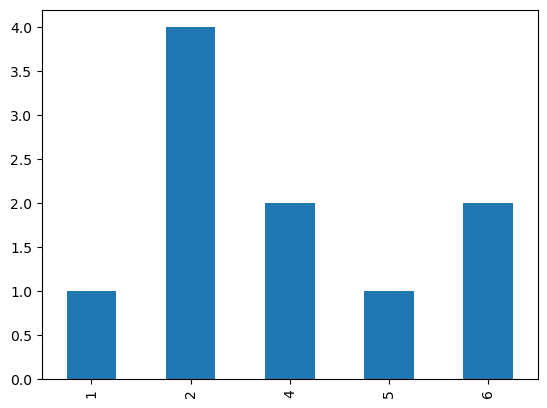

In [10]:
plot_results(fair_results)

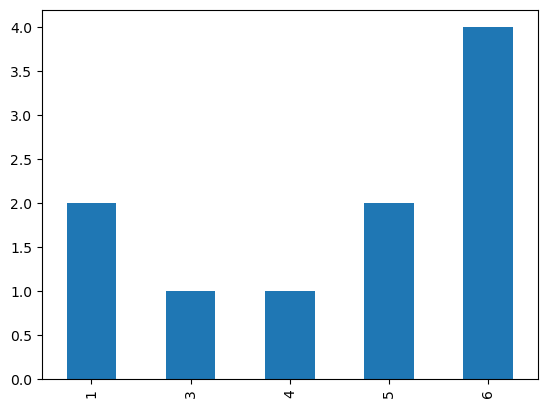

In [11]:
unfair_die = create_die([1,1,1,1,1,5])
unfair_results = roll_dice(unfair_die, n_rolls)
plot_results(unfair_results)

### Doing it all at once

In [12]:
def do_it_all(weights):
    plot_results(roll_dice(create_die(weights), n_rolls))

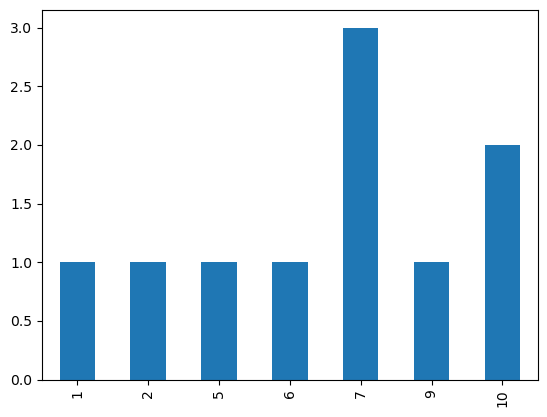

In [13]:
do_it_all(roll_dice(create_die([1,1,1,1,1,10]), n_rolls))

## Method 2: With Globals

### Define a Shared Data Structure

We create a dictionary called `config` to store our instance data.

We'll treat this as a **global**.

In [14]:
config = {}
n_rolls2 = 10

### Define Methods 

In [15]:
def create_die2(die_id):
    global config
    config[die_id]['die'] = None
    weights = config[die_id]['weights']
    n_sides = len(weights)
    my_probs = [i/sum(weights) for i in weights]
    config[die_id]['die'] = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
    })

def roll_dice2(die_id):
    global config
    global n_rolls2
    config[die_id]['results'] = None
    my_die = config[die_id]['die']
    results = []
    for i in range(n_rolls2):
        result = my_die.side.sample(weights=my_die.weights).values[0]
        results.append(result)
    config[die_id]['results'] = pd.Series(results)

def plot_results2(die_id):
    global config
    my_results = config[die_id]['results']
    my_results.value_counts().sort_index().plot.bar();

def do_it_all2(die_id):
    global config
    global n_rolls2
    print("Die ID:", die_id)
    print("Weights:", config[die_id]['weights'])
    print("Rolls:", n_rolls2)
    create_die2(die_id)
    roll_dice2(die_id)
    plot_results2(die_id)

### Populate Config

We populate our configuration config with some instances.

In [16]:
config = {
    'fair': {
        'weights': [1,1,1,1,1,1]
    },
    'unfair': {
        'weights': [1,1,1,1,10,100],
    }
}

### Call Main Function

Die ID: fair
Weights: [1, 1, 1, 1, 1, 1]
Rolls: 10


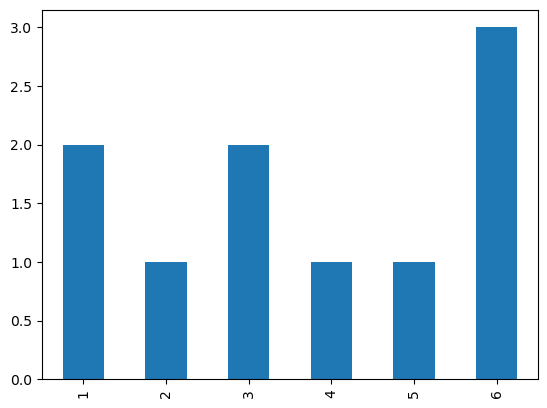

In [17]:
do_it_all2('fair')

Die ID: unfair
Weights: [1, 1, 1, 1, 10, 100]
Rolls: 10


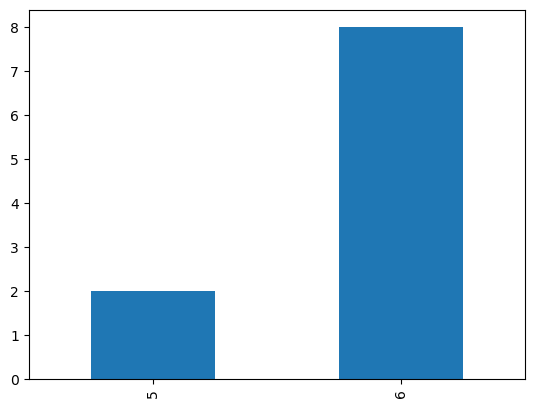

In [18]:
do_it_all2('unfair')

Die ID: unfair
Weights: [1, 1, 1, 1, 10, 100]
Rolls: 1000


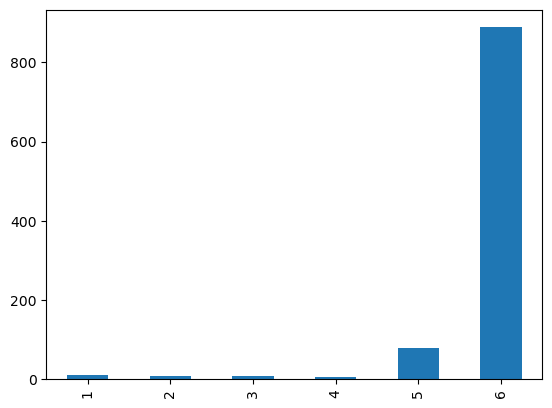

In [19]:
n_rolls2 = 1000 # We change this, but it will affect all uses of the functions until we change it.
do_it_all2('unfair')

## Method 3: As Class

Define a class that contains the config data structure and all the functions as attributes and methods.

In [20]:
class DieGame():
        
    def __init__(self):
        self.n_rolls = 10
        self.weights = [1,1,1,1,1,1]
        
    def create_die(self):
        self.n_sides = len(self.weights)
        self.my_probs = [i/sum(self.weights) for i in self.weights]
        self.die = pd.DataFrame({
            'side': range(1, self.n_sides + 1),
            'weights': self.my_probs
        })
    
    def roll_die(self):
        results = []
        for i in range(self.n_rolls):
            result = self.die.side.sample(weights=self.die.weights).values[0]
            results.append(result)
        self.results = pd.Series(results)        
        
    def plot_results(self):
        prob_model = pd.Series({i+1:round(p, 2) for i, p in enumerate(self.my_probs)})
        print("Sides:", self.n_sides)
        print("Model:")
        print(prob_model)
        print("Rolls:", self.n_rolls)
        self.results.value_counts().sort_index().plot.bar(rot=0);
        
    # We add another method because it's so easy :-)
    def plot_probs(self):
        pd.Series(self.my_probs).plot.pie(title="Die Model")
        
    def do_it_all(self):
        self.create_die()
        self.roll_die()
        self.plot_results()

Sides: 6
Model:
1    0.17
2    0.17
3    0.17
4    0.17
5    0.17
6    0.17
dtype: float64
Rolls: 100


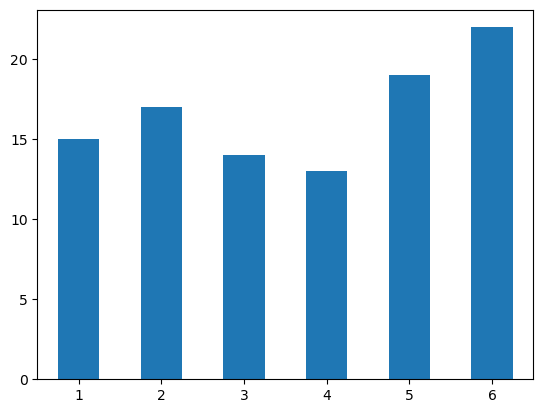

In [22]:
game_1 = DieGame()
game_1.n_rolls = 100
game_1.do_it_all()

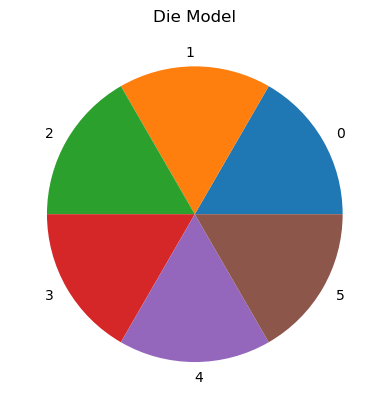

In [23]:
game_1.plot_probs()

Sides: 6
Model:
1    0.04
2    0.04
3    0.04
4    0.18
5    0.36
6    0.36
dtype: float64
Rolls: 100


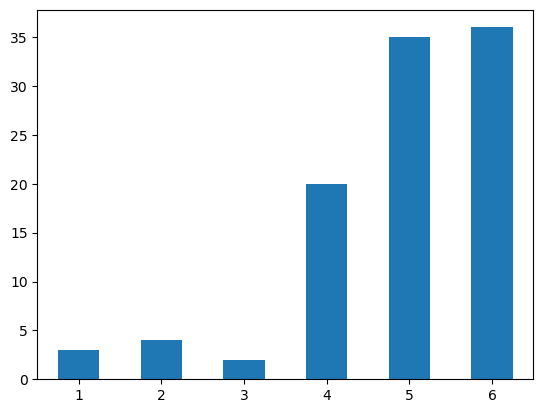

In [24]:
game_2 = DieGame()
game_2.n_rolls = 100
game_2.weights = [1,1,1,5,10,10]
game_2.do_it_all()

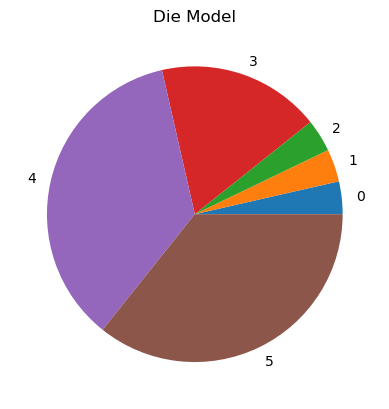

In [25]:
game_2.plot_probs()

## Conclusions

The OOP approach handles scoping issues as well as data management.

Notice how the dictionary is replaced by the object.

Not only does it provide a place to store the data, it also provides a schema for it:
* You don't need to remember what keys to put in the `data` dictionary of method 2. The object specifies them.

Notice also that we don't pass arguments to the object as we do with functions (although we can). 

We assign values to attributes directly.

**Can you think of any other advantages or disadvantages?**
